# 

In [38]:
pip install imblearn


   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   --- ----------------------------------- 20.5/258.0 kB 320.0 kB/s eta 0:00:01
   ---------- ---------------------------- 71.7/258.0 kB 558.5 kB/s eta 0:00:01
   ---------------------------------------  256.0/258.0 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 258.0/258.0 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from six.moves import urllib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf


In [2]:
df = pd.read_excel('UterineCancerDataBasic.xlsx')

columns_to_drop = ['Sample ID', 'Other Patient ID', 'Form completion date', 'Tissue Source Site',
                   'International Classification of Diseases for Oncology, Third Edition ICD-O-3 Histology Code',
                   'International Classification of Diseases for Oncology, Third Edition ICD-O-3 Site Code',
                   'American Joint Committee on Cancer Publication Version Type', 'ICD 10 Classification',
                   'ICD-O-3 Histology Code', 'ICD-O-3 Site Code', 'AJCC Publication Version Type']

# Check if the columns exist in the DataFrame before dropping
columns_to_drop_existing = [col for col in columns_to_drop if col in df.columns]

if columns_to_drop_existing:
    # Drop the specified columns
    df.drop(columns=columns_to_drop_existing, inplace=True)
    
    df.to_excel(output_excel_file, index=False)

identical_columns = [col for col in df.columns if df[col].nunique() == 1]

# Print the names of columns with identical data
print("Columns with identical data:", identical_columns)

# Drop these columns from the DataFrame
df = df.drop(columns=identical_columns)


Columns with identical data: ['Informed consent verified', 'Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value', 'Neoadjuvant Therapy Type Administered Prior To Resection Text', 'Number of Samples Per Patient', 'Sex', 'TCGA PanCanAtlas Cancer Type Acronym', 'Sample Type', 'Somatic Status', 'Tumor Disease Anatomic Site', 'Cancer Type', 'Targeted Molecular Therapy']


In [3]:
data = df
data.describe()

,Cancer Type Detailed,Overall Survival Status,Disease Free Status,Disease-specific Survival status,Progression Free Status,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score,...,Oncotree Code,Tissue Prospective Collection Indicator,Tissue Retrospective Collection Indicator,Tissue Source Site Code,TMB (nonsynonymous),Chemotherapy,Hormone Therapy,Not Specified,Other,Radiation Therapy
count,420.000000,420.000000,420.000000,419.000000,420.000000,407.000000,412.000000,418.000000,417.000000,419.000000,...,420.000000,416.000000,420.000000,420.000000,409.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,0.259524,0.109524,0.147619,0.052506,0.164286,1084.646192,0.166886,63.217703,0.438659,6.517733,...,0.259524,0.206731,0.795238,11.109524,37.063570,0.290476,0.028571,0.007143,0.002381,0.438095
std,0.523236,0.312668,0.355145,0.223312,0.370977,2767.489538,0.216792,11.010480,0.241283,10.314635,...,0.523236,0.405448,0.404009,5.599813,95.123871,0.454524,0.166797,0.084313,0.048795,0.496745
min,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,31.000000,0.237000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,47.500000,0.000800,56.000000,0.282100,0.090000,...,0.000000,0.000000,1.000000,6.000000,1.600000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,79.000000,0.049850,63.000000,0.308600,0.430000,...,0.000000,0.000000,1.000000,10.000000,2.800000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,584.500000,0.263750,70.750000,0.543800,10.845000,...,0.000000,0.000000,1.000000,13.000000,19.500000,1.000000,0.000000,0.000000,0.000000,1.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,25696.000000,0.947200,90.000000,1.304900,40.430000,...,2.000000,1.000000,1.000000,29.000000,861.866667,1.000000,1.000000,1.000000,1.000000,1.000000


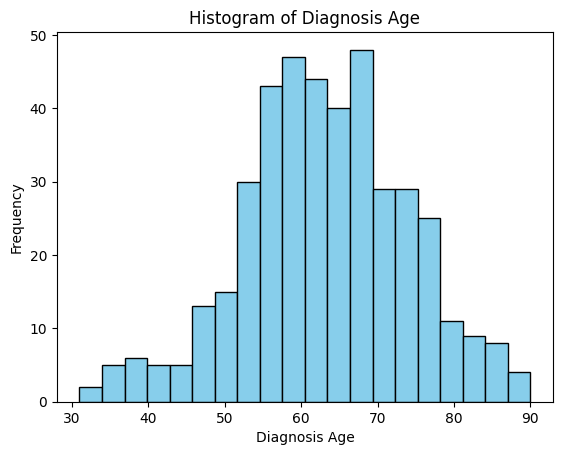

In [4]:
import matplotlib.pyplot as plt

# Histogram for Diagnosis Age
plt.hist(df['Diagnosis Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Diagnosis Age')
plt.ylabel('Frequency')
plt.title('Histogram of Diagnosis Age')
plt.show()


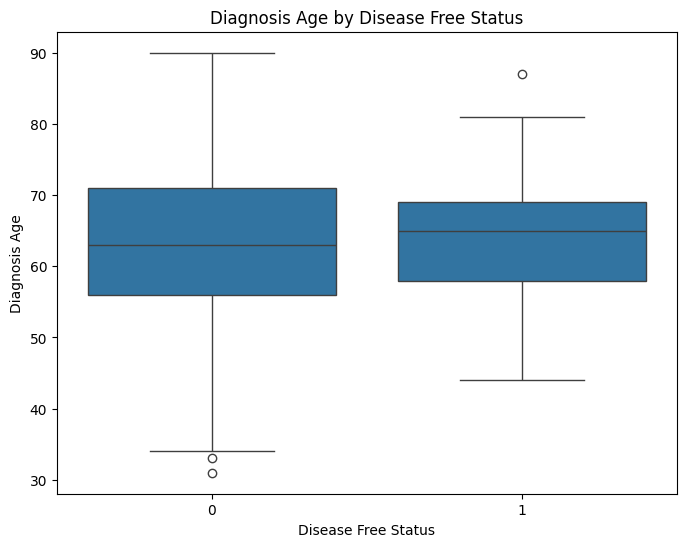

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for Diagnosis Age by Disease Free Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Disease Free Status', y='Diagnosis Age', data=df)
plt.xlabel('Disease Free Status')
plt.ylabel('Diagnosis Age')
plt.title('Diagnosis Age by Disease Free Status')
plt.show()


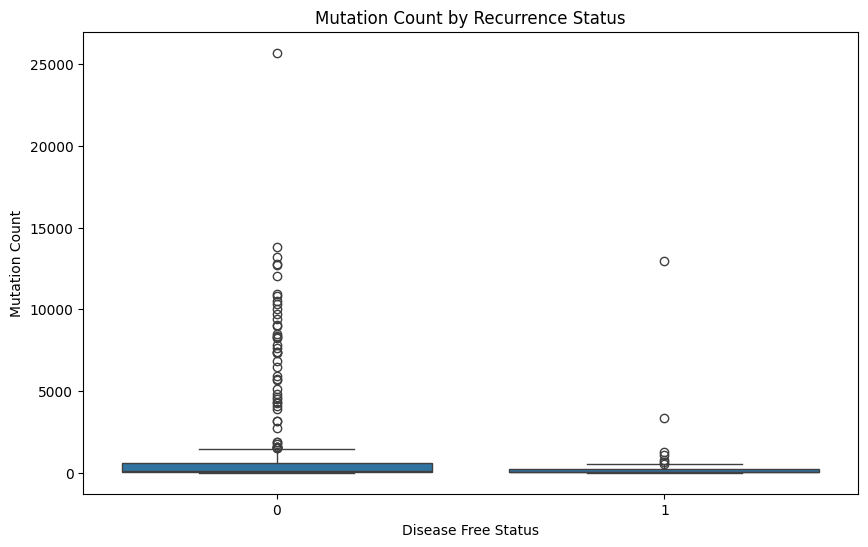

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Disease Free Status', y='Mutation Count')
plt.xlabel('Disease Free Status')
plt.ylabel('Mutation Count')
plt.title('Mutation Count by Recurrence Status')
plt.show()


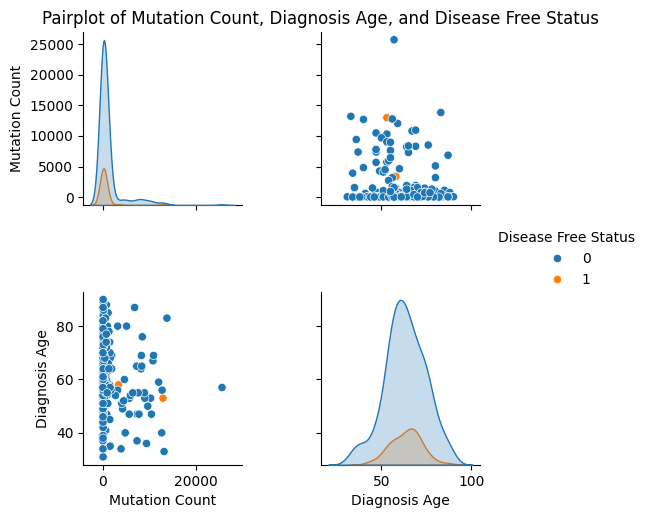

In [7]:
pairplot = sns.pairplot(data=data[['Mutation Count', 'Diagnosis Age', 'Disease Free Status']], hue='Disease Free Status')

# Adjust the spacing between plots
pairplot.fig.subplots_adjust(wspace=0.5, hspace=0.5)

# Add a title to the figure
pairplot.fig.suptitle('Pairplot of Mutation Count, Diagnosis Age, and Disease Free Status', y=1.02)

plt.show()


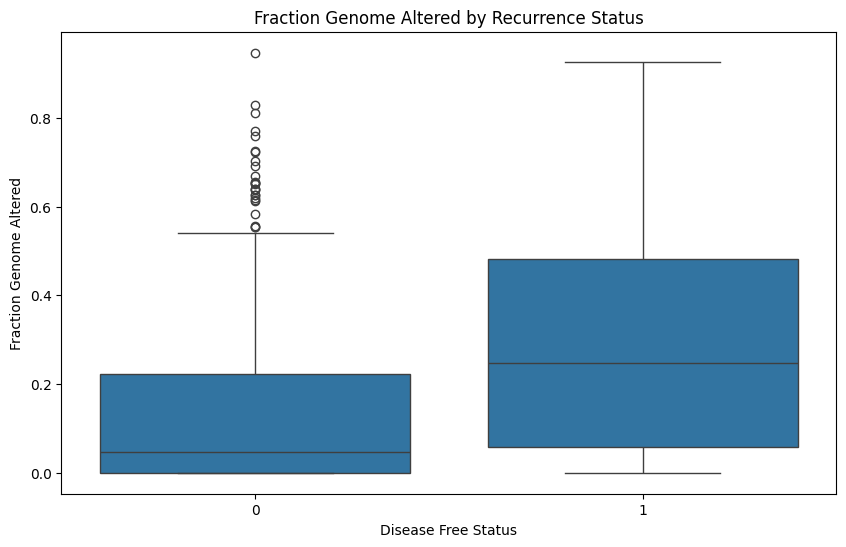

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Disease Free Status', y='Fraction Genome Altered')
plt.xlabel('Disease Free Status')
plt.ylabel('Fraction Genome Altered')
plt.title('Fraction Genome Altered by Recurrence Status')
plt.show()

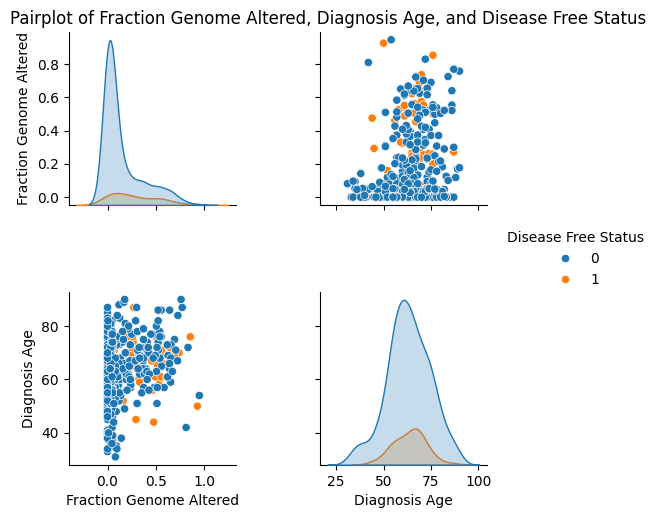

In [9]:
pairplot = sns.pairplot(data=data[['Fraction Genome Altered', 'Diagnosis Age', 'Disease Free Status']], hue='Disease Free Status')

# Adjust the spacing between plots
pairplot.fig.subplots_adjust(wspace=0.5, hspace=0.5)

# Add a title to the figure
pairplot.fig.suptitle('Pairplot of Fraction Genome Altered, Diagnosis Age, and Disease Free Status', y=1.02)

plt.show()

In [10]:
columns_with_missing_values = data.columns[data.isnull().any()]

# Print the names of columns with missing values
print("Columns with missing values:")
for col in columns_with_missing_values:
    print(col)

# Optionally, you can also print the number of missing values in each column
print("\nNumber of missing values in each column:")
print(data.isnull().sum())

Columns with missing values:
Disease-specific Survival status
Mutation Count
Fraction Genome Altered
Diagnosis Age
MSI MANTIS Score
MSIsensor Score
Subtype
Birth from Initial Pathologic Diagnosis Date
Buffa Hypoxia Score
Disease Free (Months)
Genetic Ancestry Label
Last Communication Contact from Initial Pathologic Diagnosis Date
New Neoplasm Event Post Initial Therapy Indicator
Patient Weight
Person Neoplasm Cancer Status
Radiation Therapy_x
Ragnum Hypoxia Score
Winter Hypoxia Score
Aneuploidy Score
Tissue Prospective Collection Indicator
TMB (nonsynonymous)

Number of missing values in each column:
Patient ID                                                             0
Cancer Type Detailed                                                   0
Overall Survival Status                                                0
Disease Free Status                                                    0
Disease-specific Survival status                                       1
Progression Free Status    

In [11]:
data_xgboost = data.copy()

In [12]:
import pandas as pd


columns_to_drop = data.columns[data.isnull().sum() > 25]

# Drop those columns
data = data.drop(columns=columns_to_drop)

# Now, drop rows that have missing values in the remaining columns
data_cleaned = data.dropna()

# Print the resulting DataFrame
print("Data after dropping columns with more than 25 missing values and rows with any missing values:")
print(data_cleaned)

print(data_cleaned.shape[0])
print(data_cleaned.shape[1])
data_shuffled = data_cleaned.sample(frac=1, random_state=42)


# Features (X) are all columns except 'ID' and 'Stage'
X = data_shuffled.drop(['Patient ID', 'Disease Free Status'], axis=1)

# Target variable (y) is 'Stage'
y = data_shuffled['Disease Free Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Data after dropping columns with more than 25 missing values and rows with any missing values:
       Patient ID  Cancer Type Detailed  Overall Survival Status  \
1    TCGA-A5-A0GJ                     0                        0   
2    TCGA-A5-A0GV                     0                        0   
3    TCGA-A5-A0R8                     0                        0   
4    TCGA-A5-A1OG                     1                        1   
6    TCGA-A5-A7WK                     2                        0   
..            ...                   ...                      ...   
415  TCGA-QF-A5YT                     0                        0   
416  TCGA-QS-A5YQ                     0                        0   
417  TCGA-SJ-A6ZI                     0                        0   
418  TCGA-SJ-A6ZJ                     0                        0   
419  TCGA-SL-A6JA                     0                        0   

     Disease Free Status  Disease-specific Survival status  \
1                      1  

In [13]:
classifier_dt = DecisionTreeClassifier(random_state=42)
classifier_hgb = HistGradientBoostingClassifier(random_state=42)
# classifier_mnb = MultinomialNB()
classifier_knn = KNeighborsClassifier()
classifier_gb = GradientBoostingClassifier(random_state=42)

In [14]:
# Create an ensemble model using majority voting
ensemble_classifier = VotingClassifier(
    estimators=[
        ('dt', classifier_dt),
        ('hgb', classifier_hgb),
        # ('mnb', classifier_mnb),
        ('knn', classifier_knn),
        ('gb', classifier_gb)
    ],
    voting='soft' 
)

In [15]:
# Train the classifiers
for classifier in (classifier_dt, classifier_hgb,
                   # classifier_mnb,
                   classifier_knn, 
                   classifier_gb, 
                   ensemble_classifier):
    classifier.fit(X_train, y_train)

In [16]:
y_pred_dt = classifier_dt.predict(X_test)
y_pred_hgb = classifier_hgb.predict(X_test)
# y_pred_mnb = classifier_mnb.predict(X_test)
y_pred_knn = classifier_knn.predict(X_test)
y_pred_gb = classifier_gb.predict(X_test)
y_pred_ensemble = ensemble_classifier.predict(X_test)

In [17]:
# Evaluate the individual classifiers
for name, y_pred in zip(('Decision Tree', 'Hist Gradient Boosting', 
                         # 'Multinomial Naive Bayes',
                         'k-NN', 
                         'Gradient Boosting', 
                         'Ensemble'), 
                        (y_pred_dt, y_pred_hgb, 
                         # y_pred_mnb,
                         y_pred_knn, 
                         y_pred_gb, 
                         y_pred_ensemble)):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

Decision Tree Accuracy: 1.0000
Hist Gradient Boosting Accuracy: 1.0000
k-NN Accuracy: 0.8529
Gradient Boosting Accuracy: 0.9853
Ensemble Accuracy: 1.0000


In [18]:
# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print(f"\nEnsemble Accuracy: {ensemble_accuracy:.4f}")


Ensemble Accuracy: 1.0000


In [19]:
# Display the classification report for the ensemble model
print("\nEnsemble Classification Report:")
print(classification_report(y_test, y_pred_ensemble))


Ensemble Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        10

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68



In [20]:
# Display the classification report for the ensemble model
print("\nEnsemble Classification Report:")
report_dict = classification_report(y_test, y_pred_ensemble, output_dict=True, labels=np.unique(y))
print(f"Sensitivity: {report_dict['1']['recall']:.4f}")
print(f"Specificity: {report_dict['0']['recall']:.4f}")


Ensemble Classification Report:
Sensitivity: 1.0000
Specificity: 1.0000


In [21]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_ensemble)
print(conf_matrix)

[[58  0]
 [ 0 10]]


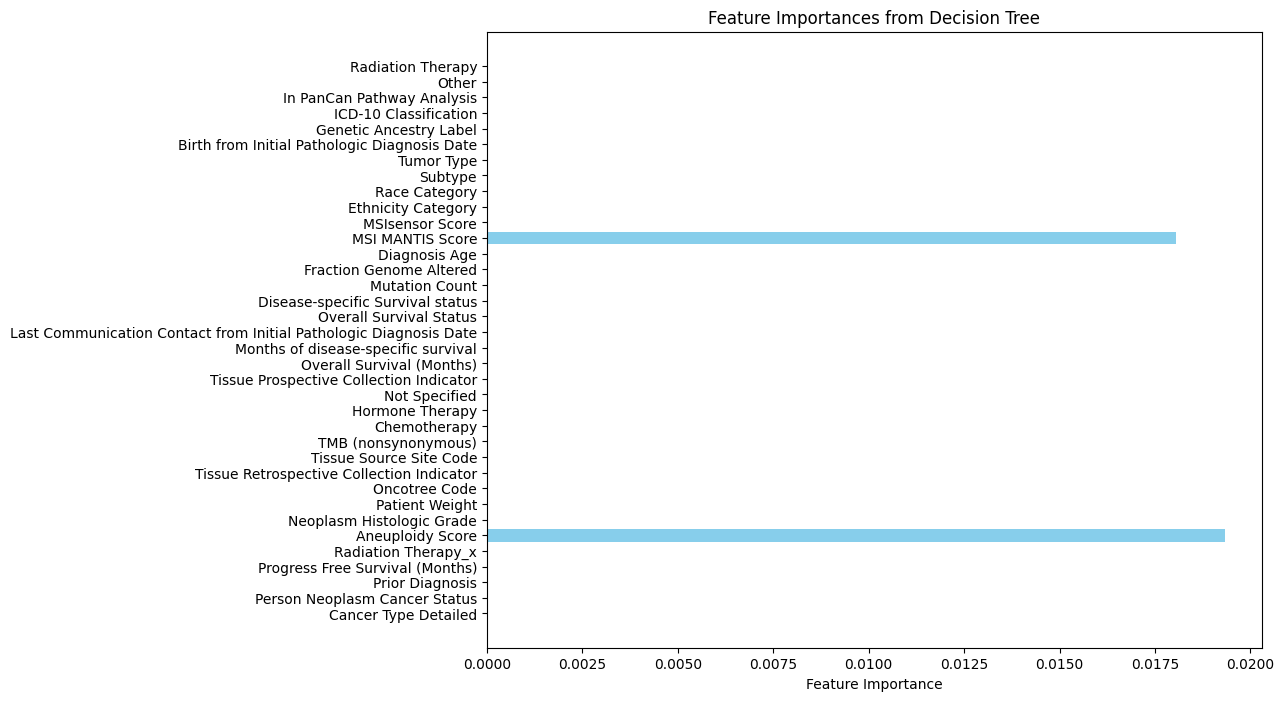

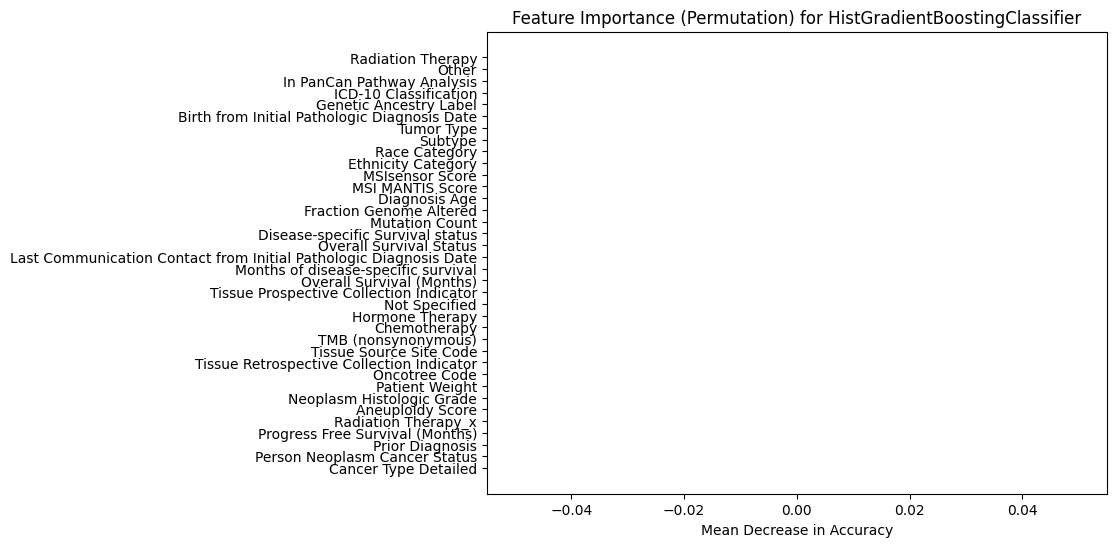

In [22]:
from sklearn.inspection import permutation_importance

# Assuming 'Excluded_Column' is the column to exclude
excluded_columns = ['Disease Free (Months)', 'Progression Free Status']

# Remove the excluded column from the feature names
feature_names = X.columns.tolist()
for col in excluded_columns:
    if col in feature_names:
        feature_names.remove(col)

# Assuming the classifier has already been trained and feature_importances_dt is available
feature_importances_dt = classifier_dt.feature_importances_

# Remove the excluded column from the feature importances
excluded_idx = [X.columns.get_loc(col) for col in excluded_columns]
feature_importances_dt = np.delete(feature_importances_dt, excluded_idx)

# Calculate permutation importances
results = permutation_importance(classifier_hgb, X_test, y_test, n_repeats=10, random_state=42)

# Remove the excluded column from permutation importances
importances = np.delete(results.importances_mean, excluded_idx)
sorted_indices = np.argsort(importances)

# Visualize the Decision Tree feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_indices)), feature_importances_dt[sorted_indices], color='skyblue')
plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Decision Tree')
plt.show()

# Visualize the permutation importances
plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], color='dodgerblue')
plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Mean Decrease in Accuracy')
plt.title('Feature Importance (Permutation) for HistGradientBoostingClassifier')
plt.show()

In [23]:
df = pd.DataFrame(data_cleaned)

# Group by 'MSI Score' and calculate recurrence rate
msi_grouped = df.groupby('MSI MANTIS Score')['Disease Free Status'].mean()

# Group by 'Aneuploidy Score' and calculate recurrence rate
aneuploidy_grouped = df.groupby('Aneuploidy Score')['Disease Free Status'].mean()

print("Recurrence Rate by MSI Score:")
print(msi_grouped)

print("\nRecurrence Rate by Aneuploidy Score:")
print(aneuploidy_grouped)

Recurrence Rate by MSI Score:
MSI MANTIS Score
0.2370    0.0
0.2415    0.0
0.2416    0.0
0.2436    0.0
0.2458    0.0
         ... 
1.1152    0.0
1.1265    0.0
1.1312    0.0
1.2214    0.0
1.3049    0.0
Name: Disease Free Status, Length: 311, dtype: float64

Recurrence Rate by Aneuploidy Score:
Aneuploidy Score
0.0     0.026786
1.0     0.148936
2.0     0.029412
3.0     0.250000
4.0     0.187500
5.0     0.181818
6.0     0.071429
7.0     0.285714
8.0     0.333333
9.0     0.333333
10.0    0.000000
11.0    0.285714
12.0    0.000000
13.0    0.000000
14.0    0.000000
15.0    0.333333
16.0    0.285714
17.0    0.250000
18.0    0.333333
19.0    0.250000
20.0    0.250000
21.0    0.000000
22.0    1.000000
23.0    0.000000
24.0    0.333333
25.0    0.000000
26.0    0.000000
27.0    0.000000
31.0    0.000000
Name: Disease Free Status, dtype: float64


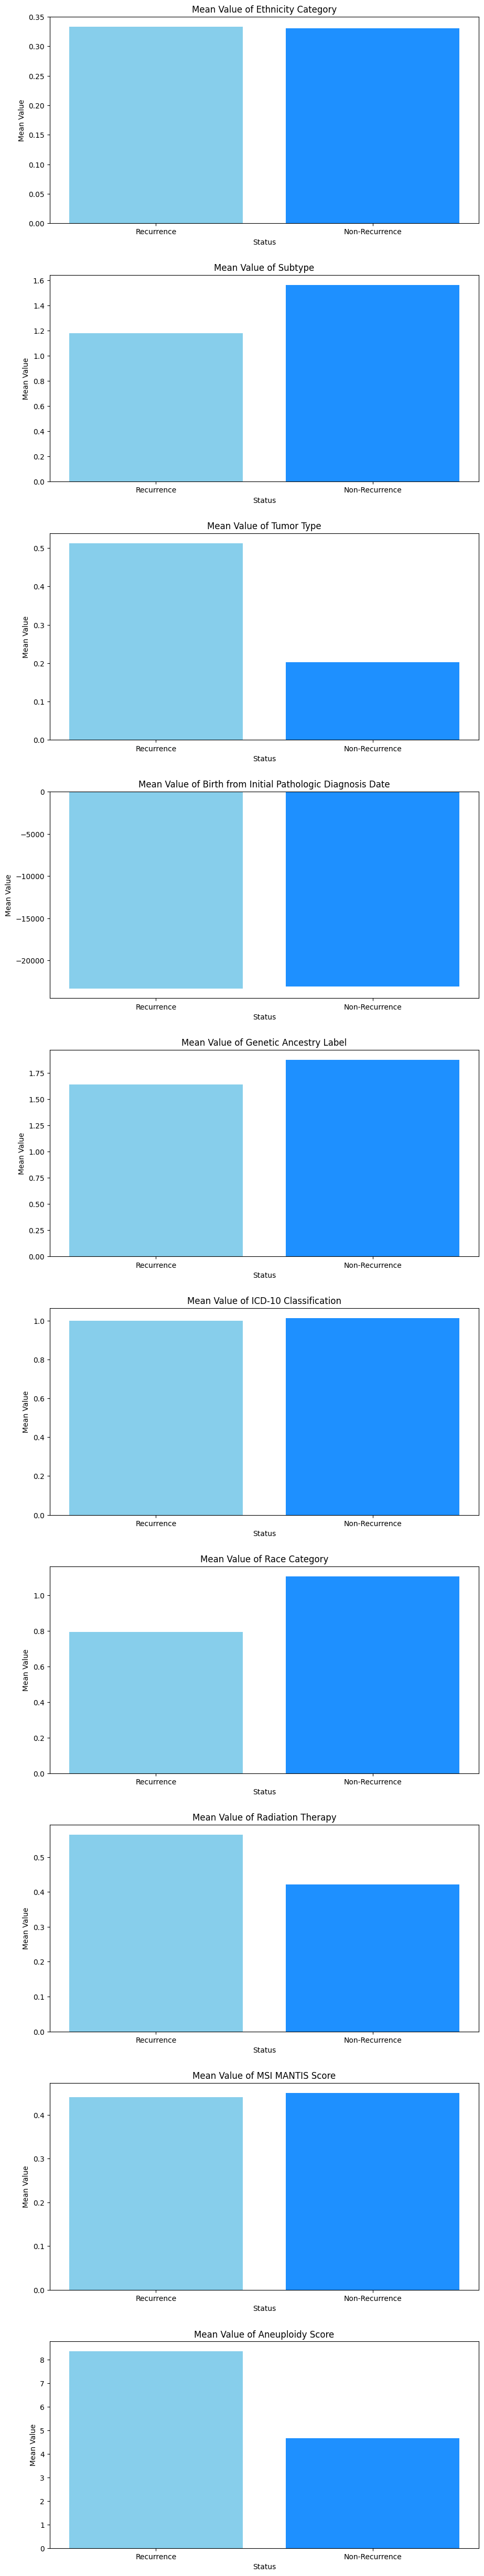

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

N = 10  # For example, top 10 important features
top_indices = np.argsort(feature_importances_dt)[-N:]
top_features = [feature_names[i] for i in top_indices]

# Create a DataFrame from your feature data and target labels
X_df = pd.DataFrame(X, columns=feature_names)
y_df = pd.Series(y, name='Disease Free Status')

# Combine the features and target into one DataFrame
data = pd.concat([X_df, y_df], axis=1)

# Filter the data based on recurrence status
recurrence_data = data[data['Disease Free Status'] == 1]
non_recurrence_data = data[data['Disease Free Status'] == 0]

# Calculate mean values of the top important features for recurrence and non-recurrence cases
recurrence_means = recurrence_data[top_features].mean()
non_recurrence_means = non_recurrence_data[top_features].mean()

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': top_features,
    'Recurrence Mean': recurrence_means,
    'Non-Recurrence Mean': non_recurrence_means
})

# Plot bar graphs for the important features and their mean values for recurrence and non-recurrence cases
fig, axes = plt.subplots(nrows=N, ncols=1, figsize=(10, 5 * N))
fig.tight_layout(pad=5.0)

for i, feature in enumerate(top_features):
    axes[i].bar(['Recurrence', 'Non-Recurrence'], [recurrence_means[feature], non_recurrence_means[feature]], color=['skyblue', 'dodgerblue'])
    axes[i].set_title(f'Mean Value of {feature}')
    axes[i].set_ylabel('Mean Value')
    axes[i].set_xlabel('Status')

plt.show()


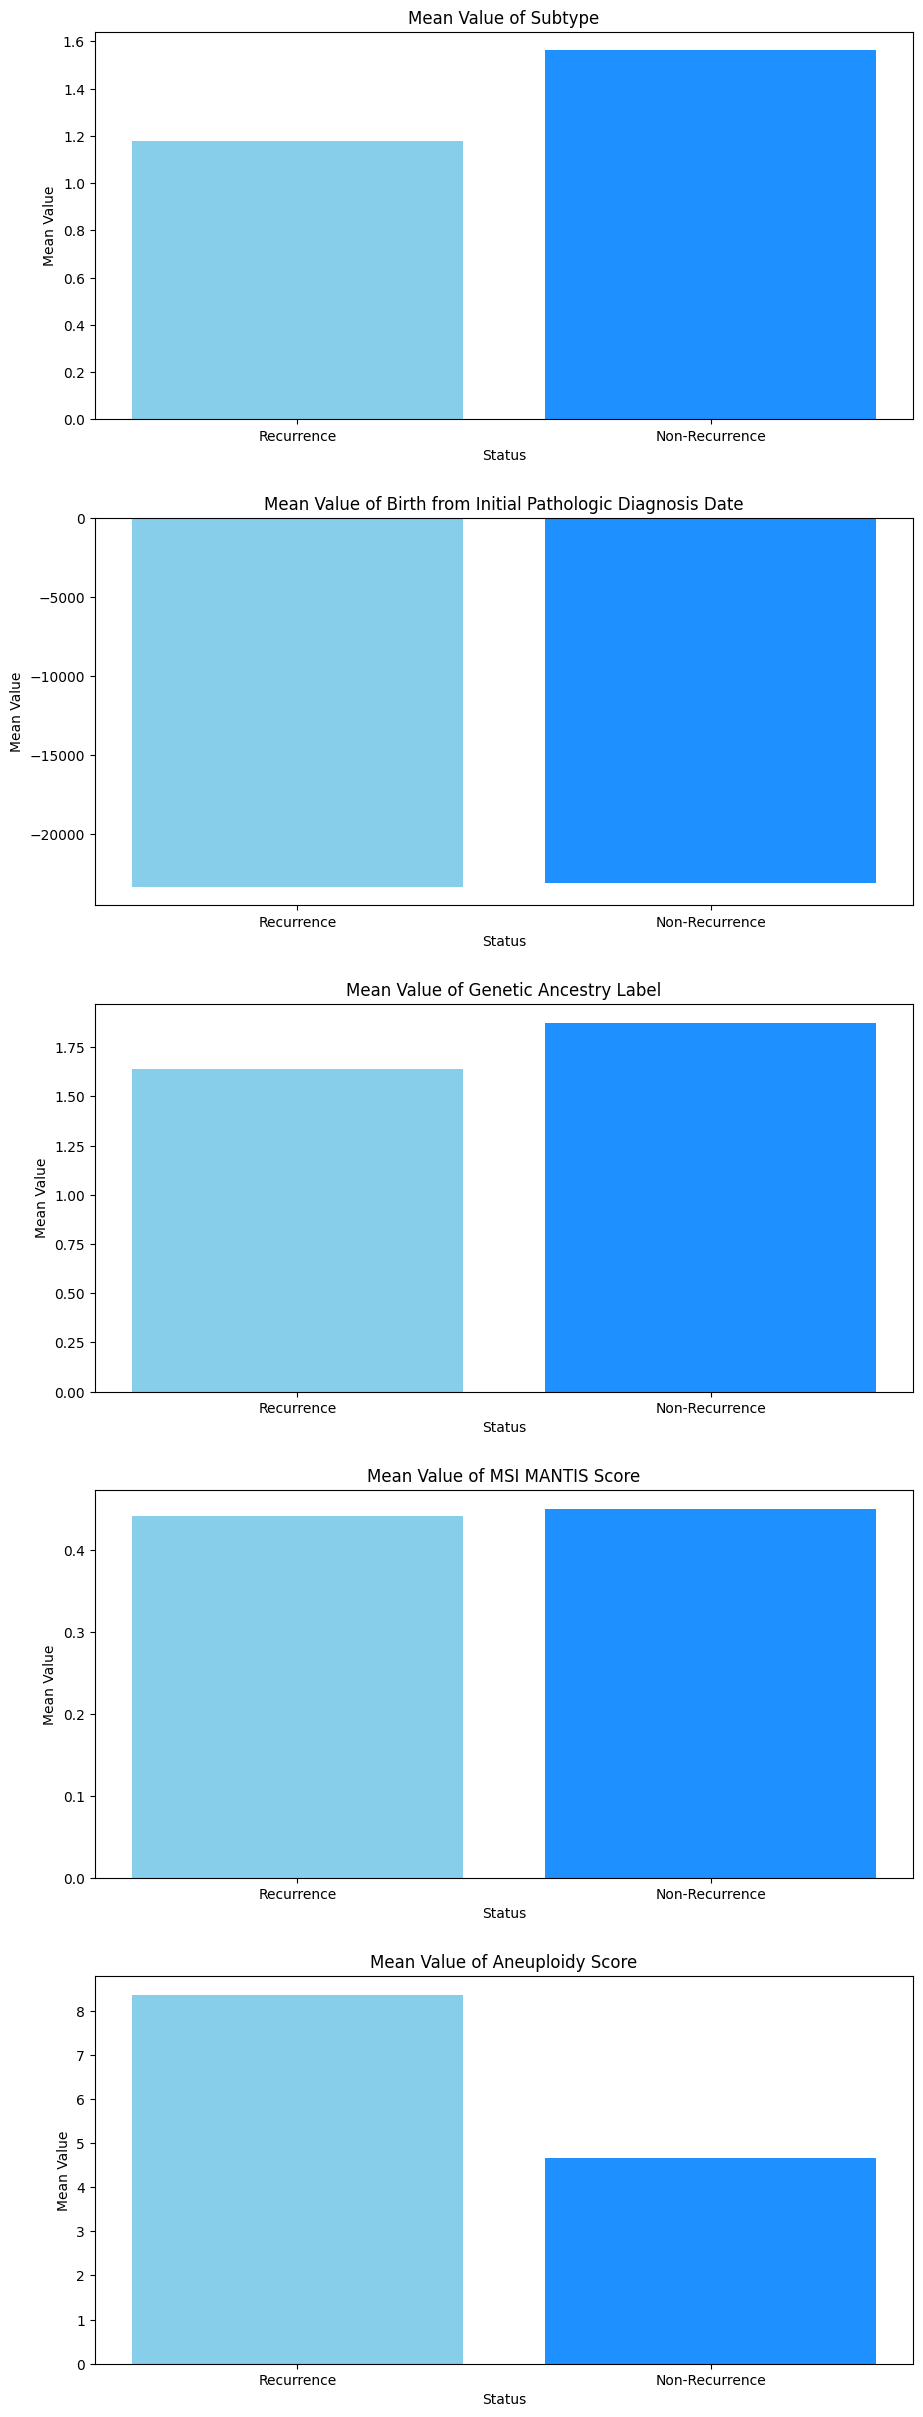

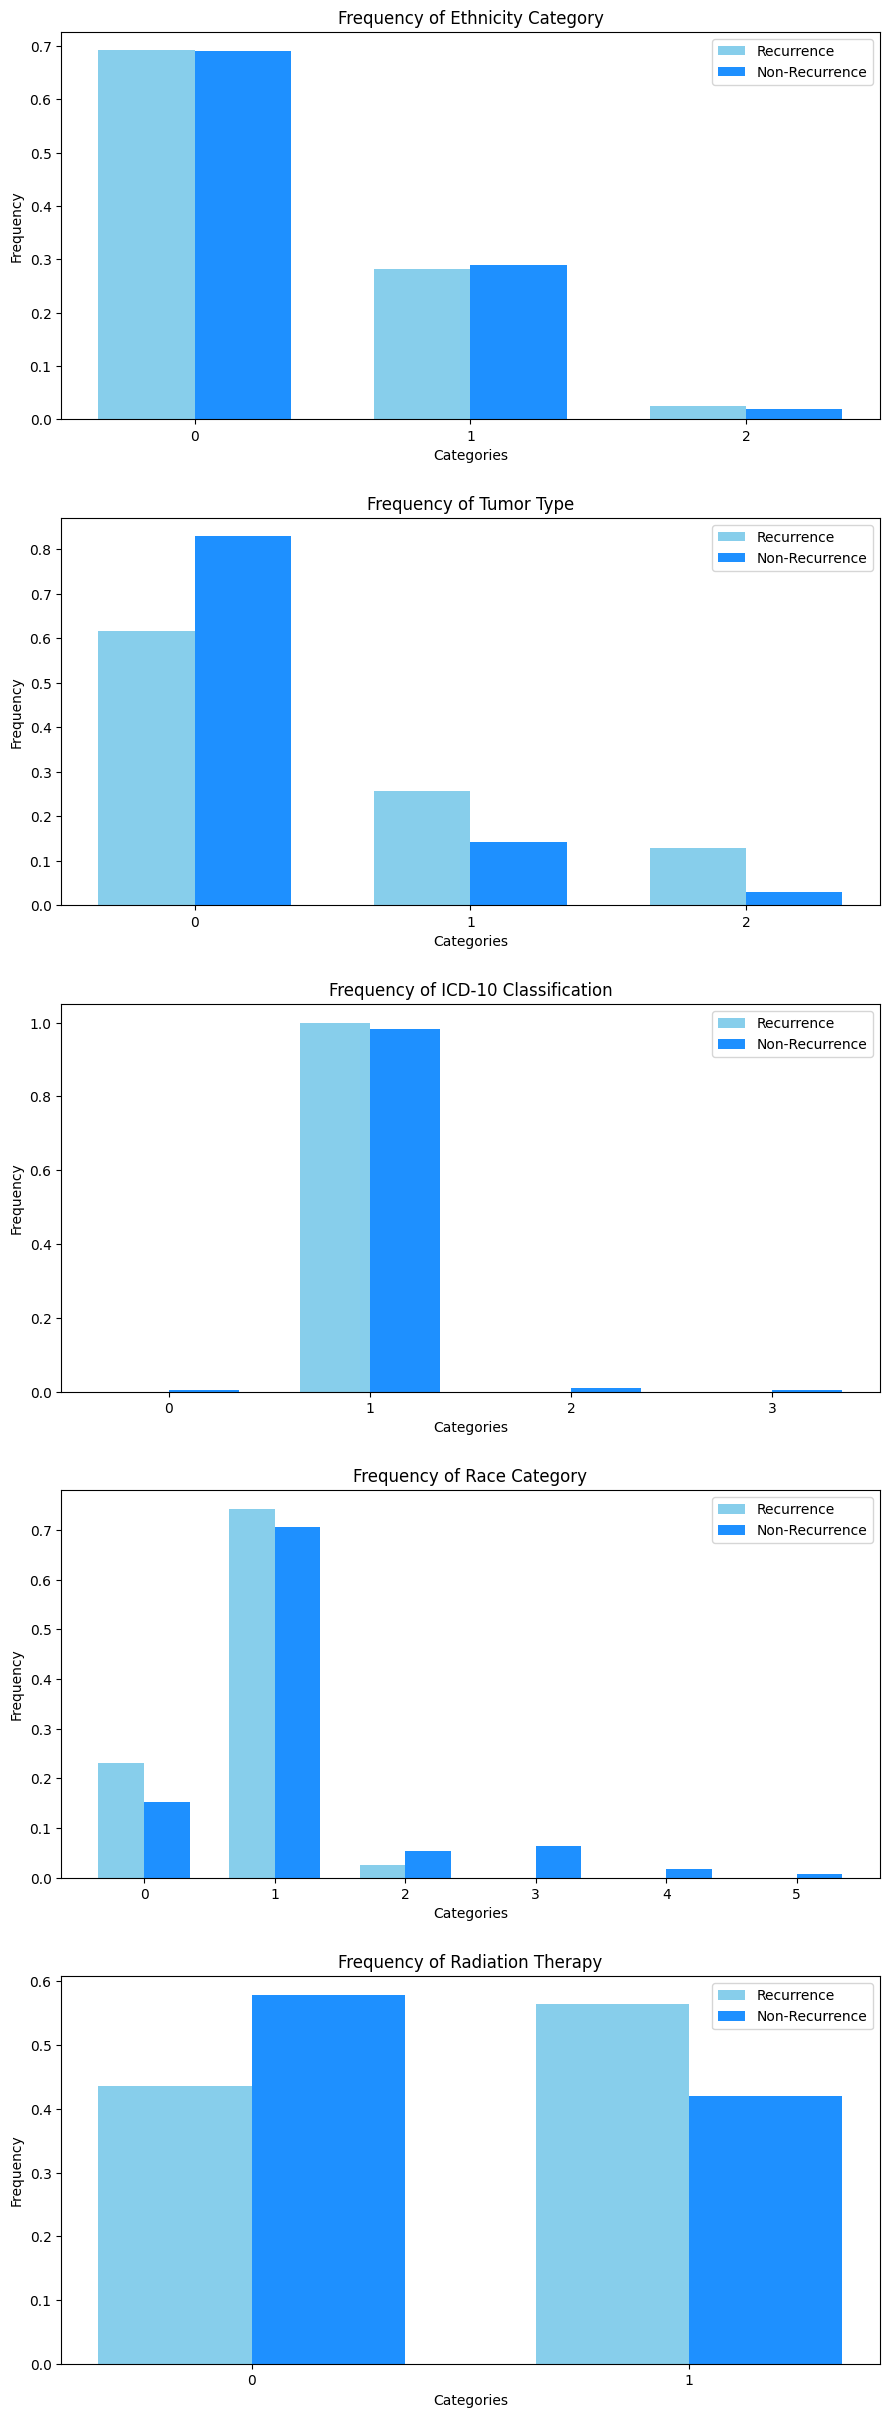

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'feature_names' contains the names of the features and 'feature_importances_dt' contains their importances
# Let's identify the top N important features (you can choose N based on your preference)
N = 10  # For example, top 10 important features
top_indices = np.argsort(feature_importances_dt)[-N:]
top_features = [feature_names[i] for i in top_indices]

# Create a DataFrame from your feature data and target labels
X_df = pd.DataFrame(X, columns=feature_names)
y_df = pd.Series(y, name='Disease Free Status')

# Combine the features and target into one DataFrame
data = pd.concat([X_df, y_df], axis=1)

# Filter the data based on recurrence status
recurrence_data = data[data['Disease Free Status'] == 1]
non_recurrence_data = data[data['Disease Free Status'] == 0]

categorical_features = []
numerical_features = []

for feature in top_features:
    if np.issubdtype(data[feature].dtype, np.integer):  # Check if the feature is integer type
        categorical_features.append(feature)
    else:
        numerical_features.append(feature)

# Calculate mean values for numerical features
recurrence_means = recurrence_data[numerical_features].mean()
non_recurrence_means = non_recurrence_data[numerical_features].mean()

# Calculate frequencies for categorical features
recurrence_freqs = {}
non_recurrence_freqs = {}

for feature in categorical_features:
    unique_values = sorted(data[feature].unique())
    recurrence_counts = recurrence_data[feature].value_counts(normalize=True).reindex(unique_values, fill_value=0)
    non_recurrence_counts = non_recurrence_data[feature].value_counts(normalize=True).reindex(unique_values, fill_value=0)
    
    recurrence_freqs[feature] = recurrence_counts
    non_recurrence_freqs[feature] = non_recurrence_counts

# Plot bar graphs for numerical features
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(10, 5 * len(numerical_features)))
fig.tight_layout(pad=5.0)

for i, feature in enumerate(numerical_features):
    axes[i].bar(['Recurrence', 'Non-Recurrence'], [recurrence_means[feature], non_recurrence_means[feature]], color=['skyblue', 'dodgerblue'])
    axes[i].set_title(f'Mean Value of {feature}')
    axes[i].set_ylabel('Mean Value')
    axes[i].set_xlabel('Status')

plt.show()

# Plot bar graphs for categorical features
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(10, 5 * len(categorical_features)))
fig.tight_layout(pad=5.0)

for i, feature in enumerate(categorical_features):
    x_labels = recurrence_freqs[feature].index.astype(str)
    x = np.arange(len(x_labels))
    width = 0.35
    
    axes[i].bar(x - width/2, recurrence_freqs[feature], width, label='Recurrence', color='skyblue')
    axes[i].bar(x + width/2, non_recurrence_freqs[feature], width, label='Non-Recurrence', color='dodgerblue')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(x_labels)
    axes[i].set_title(f'Frequency of {feature}')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel('Categories')
    axes[i].legend()

plt.show()


Summary statistics for recurrence:
       Aneuploidy Score  MSI MANTIS Score
count        297.000000        297.000000
mean           4.670034          0.450218
std            6.702073          0.250480
min            0.000000          0.237000
25%            0.000000          0.278700
50%            1.000000          0.308600
75%            6.000000          0.589300
max           31.000000          1.304900

Summary statistics for non-recurrence:
       Aneuploidy Score  MSI MANTIS Score
count         39.000000         39.000000
mean           8.358974          0.441144
std            7.357371          0.233818
min            0.000000          0.263000
25%            1.500000          0.286850
50%            6.000000          0.312500
75%           15.500000          0.528800
max           24.000000          1.105700


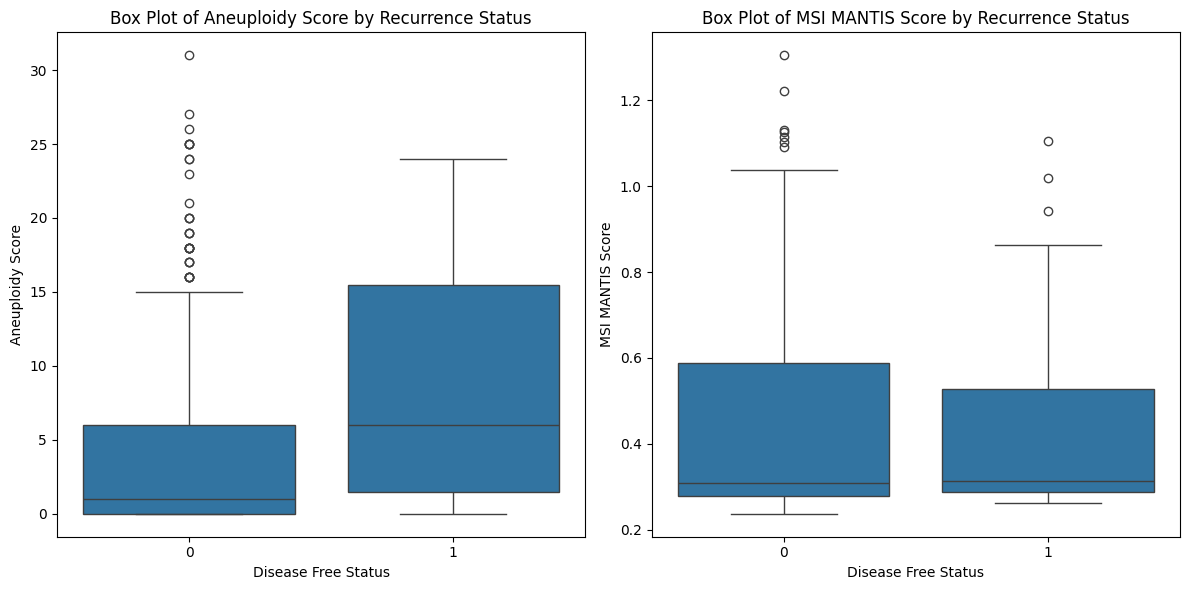

In [26]:
# Columns of interest
columns_of_interest = ['Aneuploidy Score', 'MSI MANTIS Score']

# Separate the data based on recurrence status
recurrence = data_cleaned[data_cleaned['Disease Free Status'] == 0]
non_recurrence = data_cleaned[data_cleaned['Disease Free Status'] == 1]

# Summary statistics for the columns of interest
print("Summary statistics for recurrence:")
print(recurrence[columns_of_interest].describe())

print("\nSummary statistics for non-recurrence:")
print(non_recurrence[columns_of_interest].describe())

# Box plots for the columns of interest
plt.figure(figsize=(12, 6))
for i, col in enumerate(columns_of_interest, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x='Disease Free Status', y=col, data=data_cleaned)
    plt.title(f'Box Plot of {col} by Recurrence Status')
    plt.xlabel('Disease Free Status')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


In [28]:


# Mean values for the columns of interest grouped by Disease Free Status
mean_values = data_cleaned.groupby('Disease Free Status')[columns_of_interest].mean()

# Display the mean values
print("Mean values for each Disease Free Status:")
print(mean_values)

Mean values for each Disease Free Status:
                     Aneuploidy Score  MSI MANTIS Score
Disease Free Status                                    
0                            4.670034          0.450218
1                            8.358974          0.441144


In [29]:
from scipy.stats import ttest_ind, mannwhitneyu
import numpy as np

# Check for normality (optional step, as we are directly using non-parametric test here)
# Normality can be checked using tests like Shapiro-Wilk test or visual inspection using histograms

# Define the two groups
recurrence_group = data_cleaned[data_cleaned['Disease Free Status'] == 0]
non_recurrence_group = data_cleaned[data_cleaned['Disease Free Status'] == 1]

# Significance testing for each column of interest
for col in columns_of_interest:
    # Extract the data for each group
    rec_data = recurrence_group[col].dropna()
    non_rec_data = non_recurrence_group[col].dropna()
    
    # Perform t-test (if data is normally distributed)
    # t_stat, p_val = ttest_ind(rec_data, non_rec_data, equal_var=False)
    
    # Perform Mann-Whitney U test (non-parametric test)
    u_stat, p_val = mannwhitneyu(rec_data, non_rec_data, alternative='two-sided')
    
    # Output the results
    print(f"Column: {col}")
    print(f"Mann-Whitney U statistic: {u_stat}")
    print(f"p-value: {p_val}\n")


Column: Aneuploidy Score
Mann-Whitney U statistic: 3602.0
p-value: 8.871970156515234e-05

Column: MSI MANTIS Score
Mann-Whitney U statistic: 5329.5
p-value: 0.41841943341730403

